In [3]:
#kmeans fit - 

In [4]:
#user input

In [5]:
#get id

In [6]:
#finding audio features

In [7]:
#scale af

In [8]:
#use kmean predict to find cluster

In [9]:
#return random sample from the cluster

In [1]:
import numpy as np
import pandas as pd
import pickle
import difflib
import spotipy
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score
from spotipy.oauth2 import SpotifyClientCredentials
import config

In [2]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [3]:
df = pd.read_csv('audio_features_df.csv')

In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.546,0.846,5,-5.719,1,0.1810,0.0135,0.000000,0.6070,0.740,162.043,audio_features,2gyxAWHebV7xPYVxqoi86f,spotify:track:2gyxAWHebV7xPYVxqoi86f,https://api.spotify.com/v1/tracks/2gyxAWHebV7x...,https://api.spotify.com/v1/audio-analysis/2gyx...,211141,4
1,0.868,0.538,5,-8.603,1,0.1740,0.2690,0.000003,0.0901,0.732,99.968,audio_features,2IGMVunIBsBLtEQyoI1Mu7,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4
2,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4
3,0.671,0.845,11,-4.930,0,0.0480,0.0207,0.000000,0.3290,0.775,110.056,audio_features,1vYXt7VSjH9JIM5oRRo7vA,spotify:track:1vYXt7VSjH9JIM5oRRo7vA,https://api.spotify.com/v1/tracks/1vYXt7VSjH9J...,https://api.spotify.com/v1/audio-analysis/1vYX...,176579,4
4,0.802,0.832,11,-4.107,1,0.0434,0.3110,0.000000,0.0815,0.890,124.997,audio_features,7x9aauaA9cu6tyfpHnqDLo,spotify:track:7x9aauaA9cu6tyfpHnqDLo,https://api.spotify.com/v1/tracks/7x9aauaA9cu6...,https://api.spotify.com/v1/audio-analysis/7x9a...,185427,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,0.781,0.445,2,-6.061,1,0.0295,0.4740,0.000000,0.1840,0.591,78.998,audio_features,34gCuhDGsG4bRPIf9bb02f,spotify:track:34gCuhDGsG4bRPIf9bb02f,https://api.spotify.com/v1/tracks/34gCuhDGsG4b...,https://api.spotify.com/v1/audio-analysis/34gC...,281560,4
5528,0.422,0.264,8,-7.064,1,0.0322,0.9220,0.000000,0.1320,0.331,119.930,audio_features,3U4isOIWM3VvDubwSI3y7a,spotify:track:3U4isOIWM3VvDubwSI3y7a,https://api.spotify.com/v1/tracks/3U4isOIWM3Vv...,https://api.spotify.com/v1/audio-analysis/3U4i...,269560,4
5529,0.418,0.420,0,-6.444,1,0.0414,0.5880,0.000064,0.1100,0.184,84.094,audio_features,5Nm9ERjJZ5oyfXZTECKmRt,spotify:track:5Nm9ERjJZ5oyfXZTECKmRt,https://api.spotify.com/v1/tracks/5Nm9ERjJZ5oy...,https://api.spotify.com/v1/audio-analysis/5Nm9...,172724,4
5530,0.745,0.219,5,-11.216,1,0.0276,0.8510,0.000018,0.0678,0.635,88.609,audio_features,1zNXF2svmdlNxfS5XeNUgr,spotify:track:1zNXF2svmdlNxfS5XeNUgr,https://api.spotify.com/v1/tracks/1zNXF2svmdlN...,https://api.spotify.com/v1/audio-analysis/1zNX...,186251,4


In [6]:
df_b = pd.read_csv('df_b.csv')

In [7]:
df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5532.000000,5.532000e+03,5532.000000
mean,0.565348,0.572340,5.215474,-9.597691,0.663232,0.080512,0.351248,0.149933,0.181118,0.473837,119.381745,2.264250e+05,3.893348
std,0.181723,0.264244,3.605956,6.703639,0.472648,0.100631,0.348353,0.306850,0.152748,0.256581,30.038756,1.239882e+05,0.440467
min,0.000000,0.000116,0.000000,-46.911000,0.000000,0.000000,0.000003,0.000000,0.018800,0.000000,0.000000,9.220000e+03,0.000000
25%,0.450000,0.396000,2.000000,-11.038250,0.000000,0.034800,0.032075,0.000000,0.094200,0.263000,97.012750,1.781470e+05,4.000000
50%,0.579000,0.607500,5.000000,-7.612000,1.000000,0.045900,0.214000,0.000124,0.118000,0.470500,119.983500,2.120570e+05,4.000000
75%,0.697000,0.788000,8.000000,-5.414750,1.000000,0.077900,0.673250,0.036625,0.214250,0.678000,137.945000,2.524192e+05,4.000000
max,0.975000,1.000000,11.000000,-0.450000,1.000000,0.962000,0.996000,1.000000,0.989000,0.985000,219.942000,3.809027e+06,5.000000


In [8]:
numerical = df.select_dtypes(np.number)

In [9]:
numerical.dropna(inplace=True)

In [10]:
X = numerical

In [11]:
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.546,0.846,5,-5.719,1,0.1810,0.0135,0.000000,0.6070,0.740,162.043,211141,4
1,0.868,0.538,5,-8.603,1,0.1740,0.2690,0.000003,0.0901,0.732,99.968,231750,4
2,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427,4
3,0.671,0.845,11,-4.930,0,0.0480,0.0207,0.000000,0.3290,0.775,110.056,176579,4
4,0.802,0.832,11,-4.107,1,0.0434,0.3110,0.000000,0.0815,0.890,124.997,185427,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,0.781,0.445,2,-6.061,1,0.0295,0.4740,0.000000,0.1840,0.591,78.998,281560,4
5528,0.422,0.264,8,-7.064,1,0.0322,0.9220,0.000000,0.1320,0.331,119.930,269560,4
5529,0.418,0.420,0,-6.444,1,0.0414,0.5880,0.000064,0.1100,0.184,84.094,172724,4
5530,0.745,0.219,5,-11.216,1,0.0276,0.8510,0.000018,0.0678,0.635,88.609,186251,4


In [12]:
X['time_signature'].value_counts()

4    4896
3     503
5      81
1      40
0      12
Name: time_signature, dtype: int64

In [13]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
#display(X.head())
print()
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.106482,1.035725,-0.059760,0.578647,0.712578,0.998670,-0.969645,-0.488665,2.788398,1.037441,1.420335,-0.123281,0.242156
1,1.665611,-0.129969,-0.059760,0.148394,0.712578,0.929103,-0.236126,-0.488654,-0.595924,1.006259,-0.646348,0.042951,0.242156
2,-0.073462,0.490726,1.049616,0.580437,0.712578,0.760154,-0.672505,-0.488598,-0.498368,0.351436,1.685051,-0.387153,0.242156
3,0.581442,1.031941,1.604304,0.696355,-1.403355,-0.323109,-0.948974,-0.488665,0.968237,1.173863,-0.310485,-0.402059,0.242156
4,1.302387,0.982739,1.604304,0.819135,0.712578,-0.368824,-0.115548,-0.488665,-0.652231,1.622105,0.186951,-0.330691,0.242156


In [14]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,5.532000e+03,5.532000e+03,5.532000e+03,5.532000e+03,5.532000e+03,5.532000e+03,5.532000e+03,5.532000e+03,5.532000e+03,5.532000e+03,5.532000e+03,5.532000e+03,5.532000e+03
mean,9.504729e-17,-5.137692e-18,-7.931311e-17,-6.165230e-17,7.000105e-17,9.890056e-17,2.568846e-18,-2.055077e-17,-1.387177e-16,2.311961e-17,-6.576245e-16,3.082615e-17,4.752365e-16
std,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00,1.000090e+00
min,-3.111334e+00,-2.165709e+00,-1.446480e+00,-5.566631e+00,-1.403355e+00,-8.001414e-01,-1.008394e+00,-4.886649e-01,-1.062749e+00,-1.846901e+00,-3.974616e+00,-1.751978e+00,-8.839938e+00
25%,-6.348076e-01,-6.673990e-01,-8.917924e-01,-2.149116e-01,-1.403355e+00,-4.542926e-01,-9.163173e-01,-4.886649e-01,-5.690795e-01,-8.217900e-01,-7.447385e-01,-3.894111e-01,2.421563e-01
50%,7.513006e-02,1.330695e-01,-5.976032e-02,2.962376e-01,7.125783e-01,-3.439787e-01,-3.940263e-01,-4.882591e-01,-4.132527e-01,-1.300491e-02,2.003443e-02,-1.158927e-01,2.421563e-01
75%,7.245304e-01,8.162116e-01,7.722717e-01,6.240370e-01,7.125783e-01,-2.595677e-02,9.244408e-01,-3.692962e-01,2.169290e-01,7.957802e-01,6.180327e-01,2.096698e-01,2.421563e-01
max,2.254474e+00,1.618572e+00,1.604304e+00,1.364709e+00,7.125783e-01,8.760393e+00,1.851028e+00,2.770547e+00,5.289483e+00,1.992392e+00,3.347986e+00,2.889731e+01,2.512680e+00


Training a K-Means model with 2 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 3 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 4 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 5 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 6 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 7 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 8 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 9 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 10 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 11 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 12 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 13 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 14 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 15 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 16 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 17 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 18 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 19 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 20 clusters! 



C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

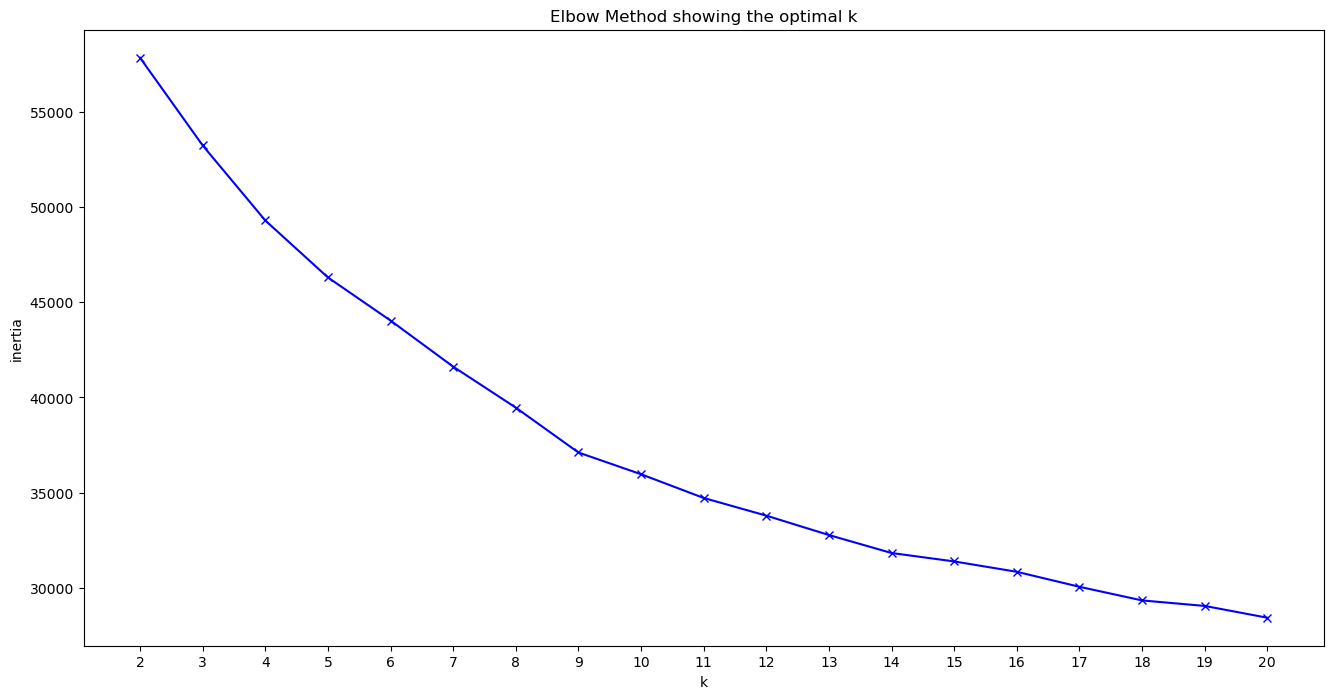

In [15]:
import pickle

K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

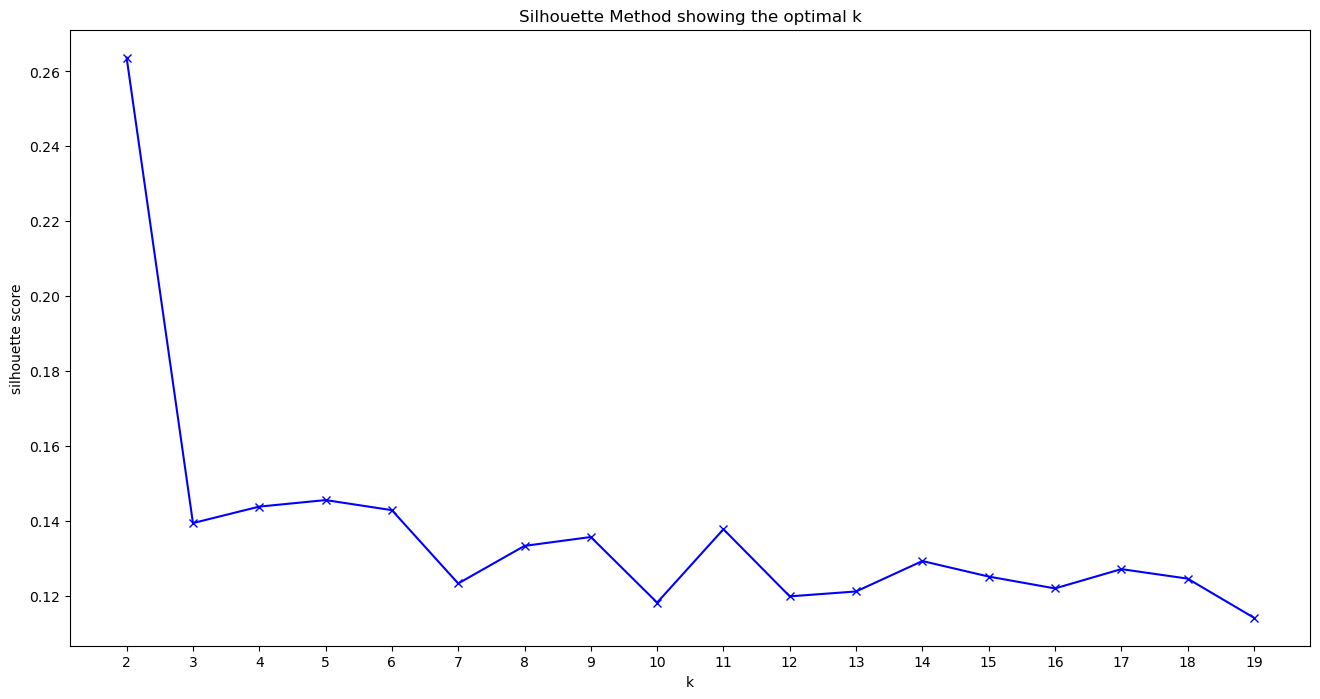

In [25]:
import pickle

K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    
    filename = "Model/kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

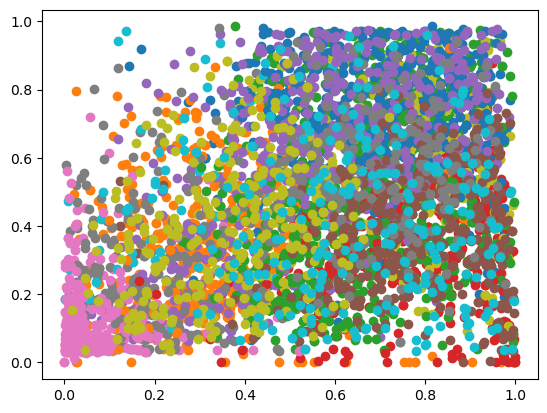

In [16]:
# assign a cluster to each example
labels = kmeans.predict(X_scaled_df)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(X.to_numpy()[row_ix, 1], X.to_numpy()[row_ix,9])
    # show the plot
pyplot.show()

In [37]:
kmeans = KMeans(n_clusters=40, random_state=1234)
kmeans.fit(X_scaled_df)

C:\Users\Serhat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=40, random_state=1234)

In [38]:
labels = kmeans.labels_
labels

array([28, 17, 33, ...,  4, 25, 19])

In [39]:
clusters_ = labels

In [40]:
np.unique(clusters_)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39])

In [41]:
X["cluster"] = clusters_
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,cluster
0,0.546,0.846,5,-5.719,1,0.1810,0.0135,0.000000,0.6070,0.740,162.043,211141,4,28
1,0.868,0.538,5,-8.603,1,0.1740,0.2690,0.000003,0.0901,0.732,99.968,231750,4,17
2,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,178427,4,33
3,0.671,0.845,11,-4.930,0,0.0480,0.0207,0.000000,0.3290,0.775,110.056,176579,4,35
4,0.802,0.832,11,-4.107,1,0.0434,0.3110,0.000000,0.0815,0.890,124.997,185427,4,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,0.781,0.445,2,-6.061,1,0.0295,0.4740,0.000000,0.1840,0.591,78.998,281560,4,25
5528,0.422,0.264,8,-7.064,1,0.0322,0.9220,0.000000,0.1320,0.331,119.930,269560,4,11
5529,0.418,0.420,0,-6.444,1,0.0414,0.5880,0.000064,0.1100,0.184,84.094,172724,4,4
5530,0.745,0.219,5,-11.216,1,0.0276,0.8510,0.000018,0.0678,0.635,88.609,186251,4,25


In [42]:
df["cluster"] = clusters_
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
0,0.546,0.846,5,-5.719,1,0.1810,0.0135,0.000000,0.6070,0.740,162.043,audio_features,2gyxAWHebV7xPYVxqoi86f,spotify:track:2gyxAWHebV7xPYVxqoi86f,https://api.spotify.com/v1/tracks/2gyxAWHebV7x...,https://api.spotify.com/v1/audio-analysis/2gyx...,211141,4,28
1,0.868,0.538,5,-8.603,1,0.1740,0.2690,0.000003,0.0901,0.732,99.968,audio_features,2IGMVunIBsBLtEQyoI1Mu7,spotify:track:2IGMVunIBsBLtEQyoI1Mu7,https://api.spotify.com/v1/tracks/2IGMVunIBsBL...,https://api.spotify.com/v1/audio-analysis/2IGM...,231750,4,17
2,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,audio_features,1BxfuPKGuaTgP7aM0Bbdwr,spotify:track:1BxfuPKGuaTgP7aM0Bbdwr,https://api.spotify.com/v1/tracks/1BxfuPKGuaTg...,https://api.spotify.com/v1/audio-analysis/1Bxf...,178427,4,33
3,0.671,0.845,11,-4.930,0,0.0480,0.0207,0.000000,0.3290,0.775,110.056,audio_features,1vYXt7VSjH9JIM5oRRo7vA,spotify:track:1vYXt7VSjH9JIM5oRRo7vA,https://api.spotify.com/v1/tracks/1vYXt7VSjH9J...,https://api.spotify.com/v1/audio-analysis/1vYX...,176579,4,35
4,0.802,0.832,11,-4.107,1,0.0434,0.3110,0.000000,0.0815,0.890,124.997,audio_features,7x9aauaA9cu6tyfpHnqDLo,spotify:track:7x9aauaA9cu6tyfpHnqDLo,https://api.spotify.com/v1/tracks/7x9aauaA9cu6...,https://api.spotify.com/v1/audio-analysis/7x9a...,185427,4,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5527,0.781,0.445,2,-6.061,1,0.0295,0.4740,0.000000,0.1840,0.591,78.998,audio_features,34gCuhDGsG4bRPIf9bb02f,spotify:track:34gCuhDGsG4bRPIf9bb02f,https://api.spotify.com/v1/tracks/34gCuhDGsG4b...,https://api.spotify.com/v1/audio-analysis/34gC...,281560,4,25
5528,0.422,0.264,8,-7.064,1,0.0322,0.9220,0.000000,0.1320,0.331,119.930,audio_features,3U4isOIWM3VvDubwSI3y7a,spotify:track:3U4isOIWM3VvDubwSI3y7a,https://api.spotify.com/v1/tracks/3U4isOIWM3Vv...,https://api.spotify.com/v1/audio-analysis/3U4i...,269560,4,11
5529,0.418,0.420,0,-6.444,1,0.0414,0.5880,0.000064,0.1100,0.184,84.094,audio_features,5Nm9ERjJZ5oyfXZTECKmRt,spotify:track:5Nm9ERjJZ5oyfXZTECKmRt,https://api.spotify.com/v1/tracks/5Nm9ERjJZ5oy...,https://api.spotify.com/v1/audio-analysis/5Nm9...,172724,4,4
5530,0.745,0.219,5,-11.216,1,0.0276,0.8510,0.000018,0.0678,0.635,88.609,audio_features,1zNXF2svmdlNxfS5XeNUgr,spotify:track:1zNXF2svmdlNxfS5XeNUgr,https://api.spotify.com/v1/tracks/1zNXF2svmdlN...,https://api.spotify.com/v1/audio-analysis/1zNX...,186251,4,25


In [22]:
df[df['cluster'] == 2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,cluster
4422,0.622,0.411,10,-15.802,0,0.0328,0.853,0.915,0.104,0.203,116.959,audio_features,3h1sX3o4ZqOQpVtxL3U1mE,spotify:track:3h1sX3o4ZqOQpVtxL3U1mE,https://api.spotify.com/v1/tracks/3h1sX3o4ZqOQ...,https://api.spotify.com/v1/audio-analysis/3h1s...,207500,4,2


In [43]:
from IPython.display import IFrame

track_id = "3dPQuX8Gs42Y7b454ybpMR"
IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )

In [24]:


def find_closest_match(user_input, titles):
    matches = difflib.get_close_matches(user_input, titles)
    if matches:
        return matches[0]  # Return the closest match
    else:
        return None

def play_song(track_id):
    return IFrame(src="https://open.spotify.com/embed/track/"+track_id,
       width="320",
       height="80",
       frameborder="0",
       allowtransparency="true",
       allow="encrypted-media",
      )  

In [44]:
user_input = input('What are you fancy to listen now?')

What are you fancy to listen now?xyz


In [47]:
user_input = input('What are you fancy to listen now?')

if user_input in df_b['titles'].values:
    print("Here you go!")
    user_input_json = sp.search(q=user_input, limit=1)
    user_input_id = user_input_json['tracks']['items'][0]['id']
    display(play_song(user_input_id))

else:
    closest_match = find_closest_match(user_input, df_b['titles'].tolist())
    
    if closest_match:
        suggestion = input(f"Do you mean '{closest_match}'? (Type 'yes' or 'no'): ")
        if suggestion.lower() == 'yes':
            closest_match_json = sp.search(q=closest_match, limit=1)
            closest_match_id = closest_match_json['tracks']['items'][0]['id']
            print("Here you go!")
            display(play_song(closest_match_id))

            song_info = df_b[df_b['titles'] == closest_match]

        else:
            print("How about this one?")
            user_input_json = sp.search(q=user_input, limit=1)
            user_input_id = user_input_json['tracks']['items'][0]['id']

            a_f = sp.audio_features(user_input_id)[0]
            af_df = pd.DataFrame(a_f, index=[0])

            af_scaled_df = af_df.select_dtypes(np.number)

            kmeans.predict(af_scaled_df)
            
            predicted_cluster = kmeans.predict(af_scaled_df)[0]

            cluster_songs = df[df['cluster'] == predicted_cluster]
            recommended_song = cluster_songs.sample(1)
            recommended_song_id = recommended_song['id'].values[0]
            
            display(play_song(recommended_song_id))



What are you fancy to listen now?Paint The Town Re
Do you mean 'Paint The Town Red'? (Type 'yes' or 'no'): no
How about this one?
